In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-v0_8-dark')

In [2]:
# Import data and year variable
store_data = pd.read_csv("data/store_data.csv", encoding = "ISO-8859-1")
store_data['Order Year'] = store_data['Order Date'].str.extract(r'(?P<Year>\d{4})', expand = True).astype(int)

# Pivot table by year, region
store_data_stratified = store_data.groupby(['Order Year', 'Region']).sum(['Sales', 'Quantity', 'Profit']).drop(['Row ID', 'Postal Code'], axis = 1)

In [3]:
# Bar plot for sales by year, region

#barplot_sales = pd.pivot_table(store_data_stratified,index=['Order Year', 'Region'],values=['Sales']).unstack().plot(kind='bar',y='Sales')
#barplot_sales.set_title("Annual Sales by Region")
#barplot_sales.set_ylabel("Sales")
#barplot_sales.set_xlabel("Year / Region")

# Bar plot for profit by, year, region
#barplot_profit = pd.pivot_table(store_data_stratified,index=['Order Year', 'Region'],values=['Profit']).unstack().plot(kind='bar',y='Profit')
#barplot_profit.set_title("Annual Profit by Region")
#barplot_profit.set_ylabel("Profit")
#barplot_profit.set_xlabel("Year / Region")

In [4]:
# Pivot table by year, category
store_data_category = store_data.groupby(['Order Year', 'Category']).sum(['Sales', 'Quantity', 'Profit']).drop(['Row ID', 'Postal Code'], axis = 1)

Text(0.5, 0, 'Year / Category')

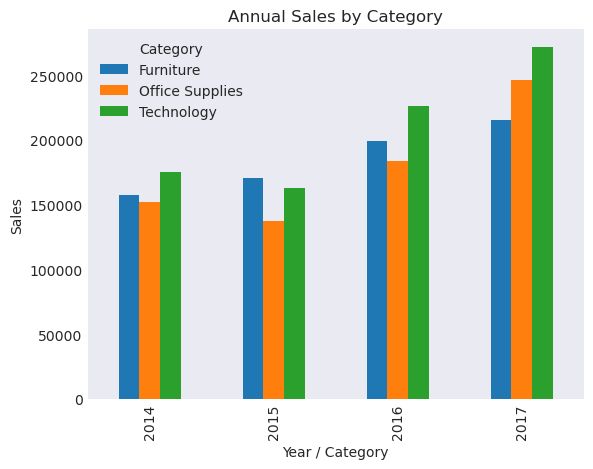

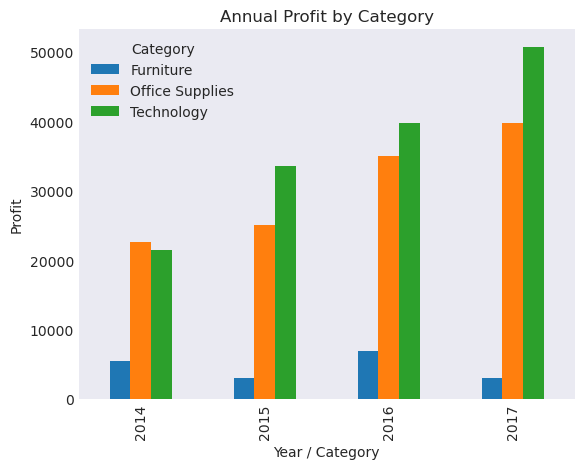

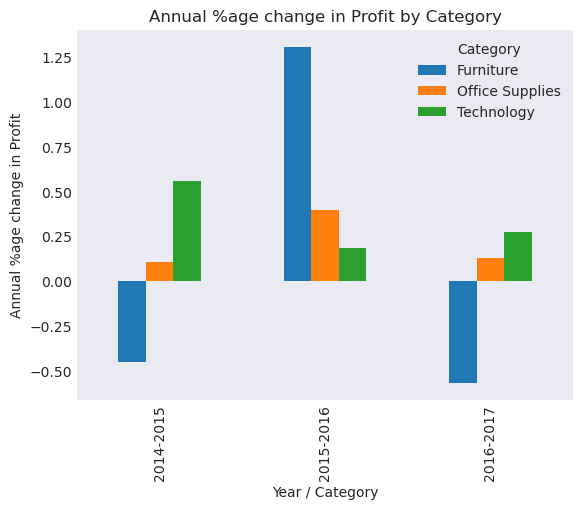

In [5]:
# Bar plot for sales by year, category
barplot_category_sales = pd.pivot_table(store_data_category,index=['Order Year', 'Category'],values=['Sales']).unstack().plot(kind='bar',y='Sales')
barplot_category_sales.set_title("Annual Sales by Category")
barplot_category_sales.set_ylabel("Sales")
barplot_category_sales.set_xlabel("Year / Category")

# Bar plot for profit by year, category
barplot_category_profit = pd.pivot_table(store_data_category,index=['Order Year', 'Category'],values=['Profit']).unstack().plot(kind='bar',y='Profit')
barplot_category_profit.set_title("Annual Profit by Category")
barplot_category_profit.set_ylabel("Profit")
barplot_category_profit.set_xlabel("Year / Category")

# Bar plot for % change in profit by year, category
category_profit_pct_change = pd.pivot_table(store_data_category,index=['Order Year', 'Category'],values=['Profit']).unstack().pct_change().drop([2014])
category_profit_pct_change.index = ['2014-2015', '2015-2016', '2016-2017']
barplot_category_profit_pct_change = category_profit_pct_change.plot(kind='bar', y = 'Profit')
barplot_category_profit_pct_change.set_title('Annual %age change in Profit by Category')
barplot_category_profit_pct_change.set_ylabel('Annual %age change in Profit')
barplot_category_profit_pct_change.set_xlabel('Year / Category')

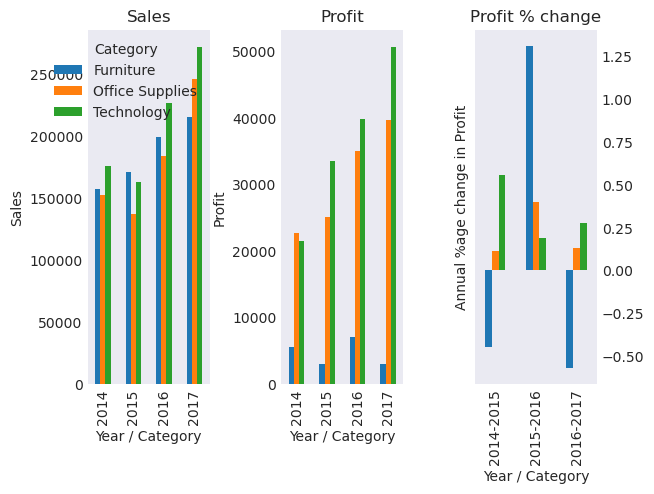

In [6]:
# arrange all 3 barplots into one line

fig, (ax, ax2, ax3) = plt.subplots(ncols=3, sharey=False)

df1 = pd.pivot_table(store_data_category,index=['Order Year', 'Category'],values=['Sales']).unstack().plot(kind='bar',y='Sales',
                                                                                                          xlabel="Year / Category",
                                                                                                          ylabel="Sales",
                                                                                                          title="Sales",
                                                                                                          ax=ax)
df2 = pd.pivot_table(store_data_category,index=['Order Year', 'Category'],values=['Profit']).unstack().plot(kind='bar',y='Profit',
                                                                                                           xlabel="Year / Category",
                                                                                                           ylabel="Profit",
                                                                                                           title="Profit",
                                                                                                           ax=ax2,
                                                                                                           legend=False)
df3 = category_profit_pct_change.plot(kind='bar', y = 'Profit',
                                     xlabel='Year / Category',
                                     ylabel='Annual %age change in Profit',
                                     title='Profit % change',
                                     ax=ax3,
                                     legend=False)
ax3.yaxis.tick_right()
plt.tight_layout(pad=0.2)